In [19]:
# import all the necessary libraries

import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 
%matplotlib inline

In [28]:
# Read the data from the csv file
data = pd.read_csv('../data/clustering_diabetesdata.csv')
data.head()

,Numb_of_Times_Preg,PlasmaglucoseConcentration,BloodPressure,SkinFoldThickness,SerumInsulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Numb_of_Times_Preg          768 non-null    int64  
 1   PlasmaglucoseConcentration  768 non-null    int64  
 2   BloodPressure               768 non-null    int64  
 3   SkinFoldThickness           768 non-null    int64  
 4   SerumInsulin                768 non-null    int64  
 5   BMI                         768 non-null    float64
 6   DiabetesPedigreeFunction    768 non-null    float64
 7   Age                         768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [30]:
data.describe()

,Numb_of_Times_Preg,PlasmaglucoseConcentration,BloodPressure,SkinFoldThickness,SerumInsulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [31]:
# pre processing the zero values
data[['PlasmaglucoseConcentration', 'BloodPressure', 'SkinFoldThickness', 'SerumInsulin', 'BMI']].replace(0, data.mean(), inplace=True)

/var/folders/jw/pk9yd5v978d_6j_wky4ptw480000gn/T/ipykernel_69435/3463843852.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [32]:
data.head()

,Numb_of_Times_Preg,PlasmaglucoseConcentration,BloodPressure,SkinFoldThickness,SerumInsulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


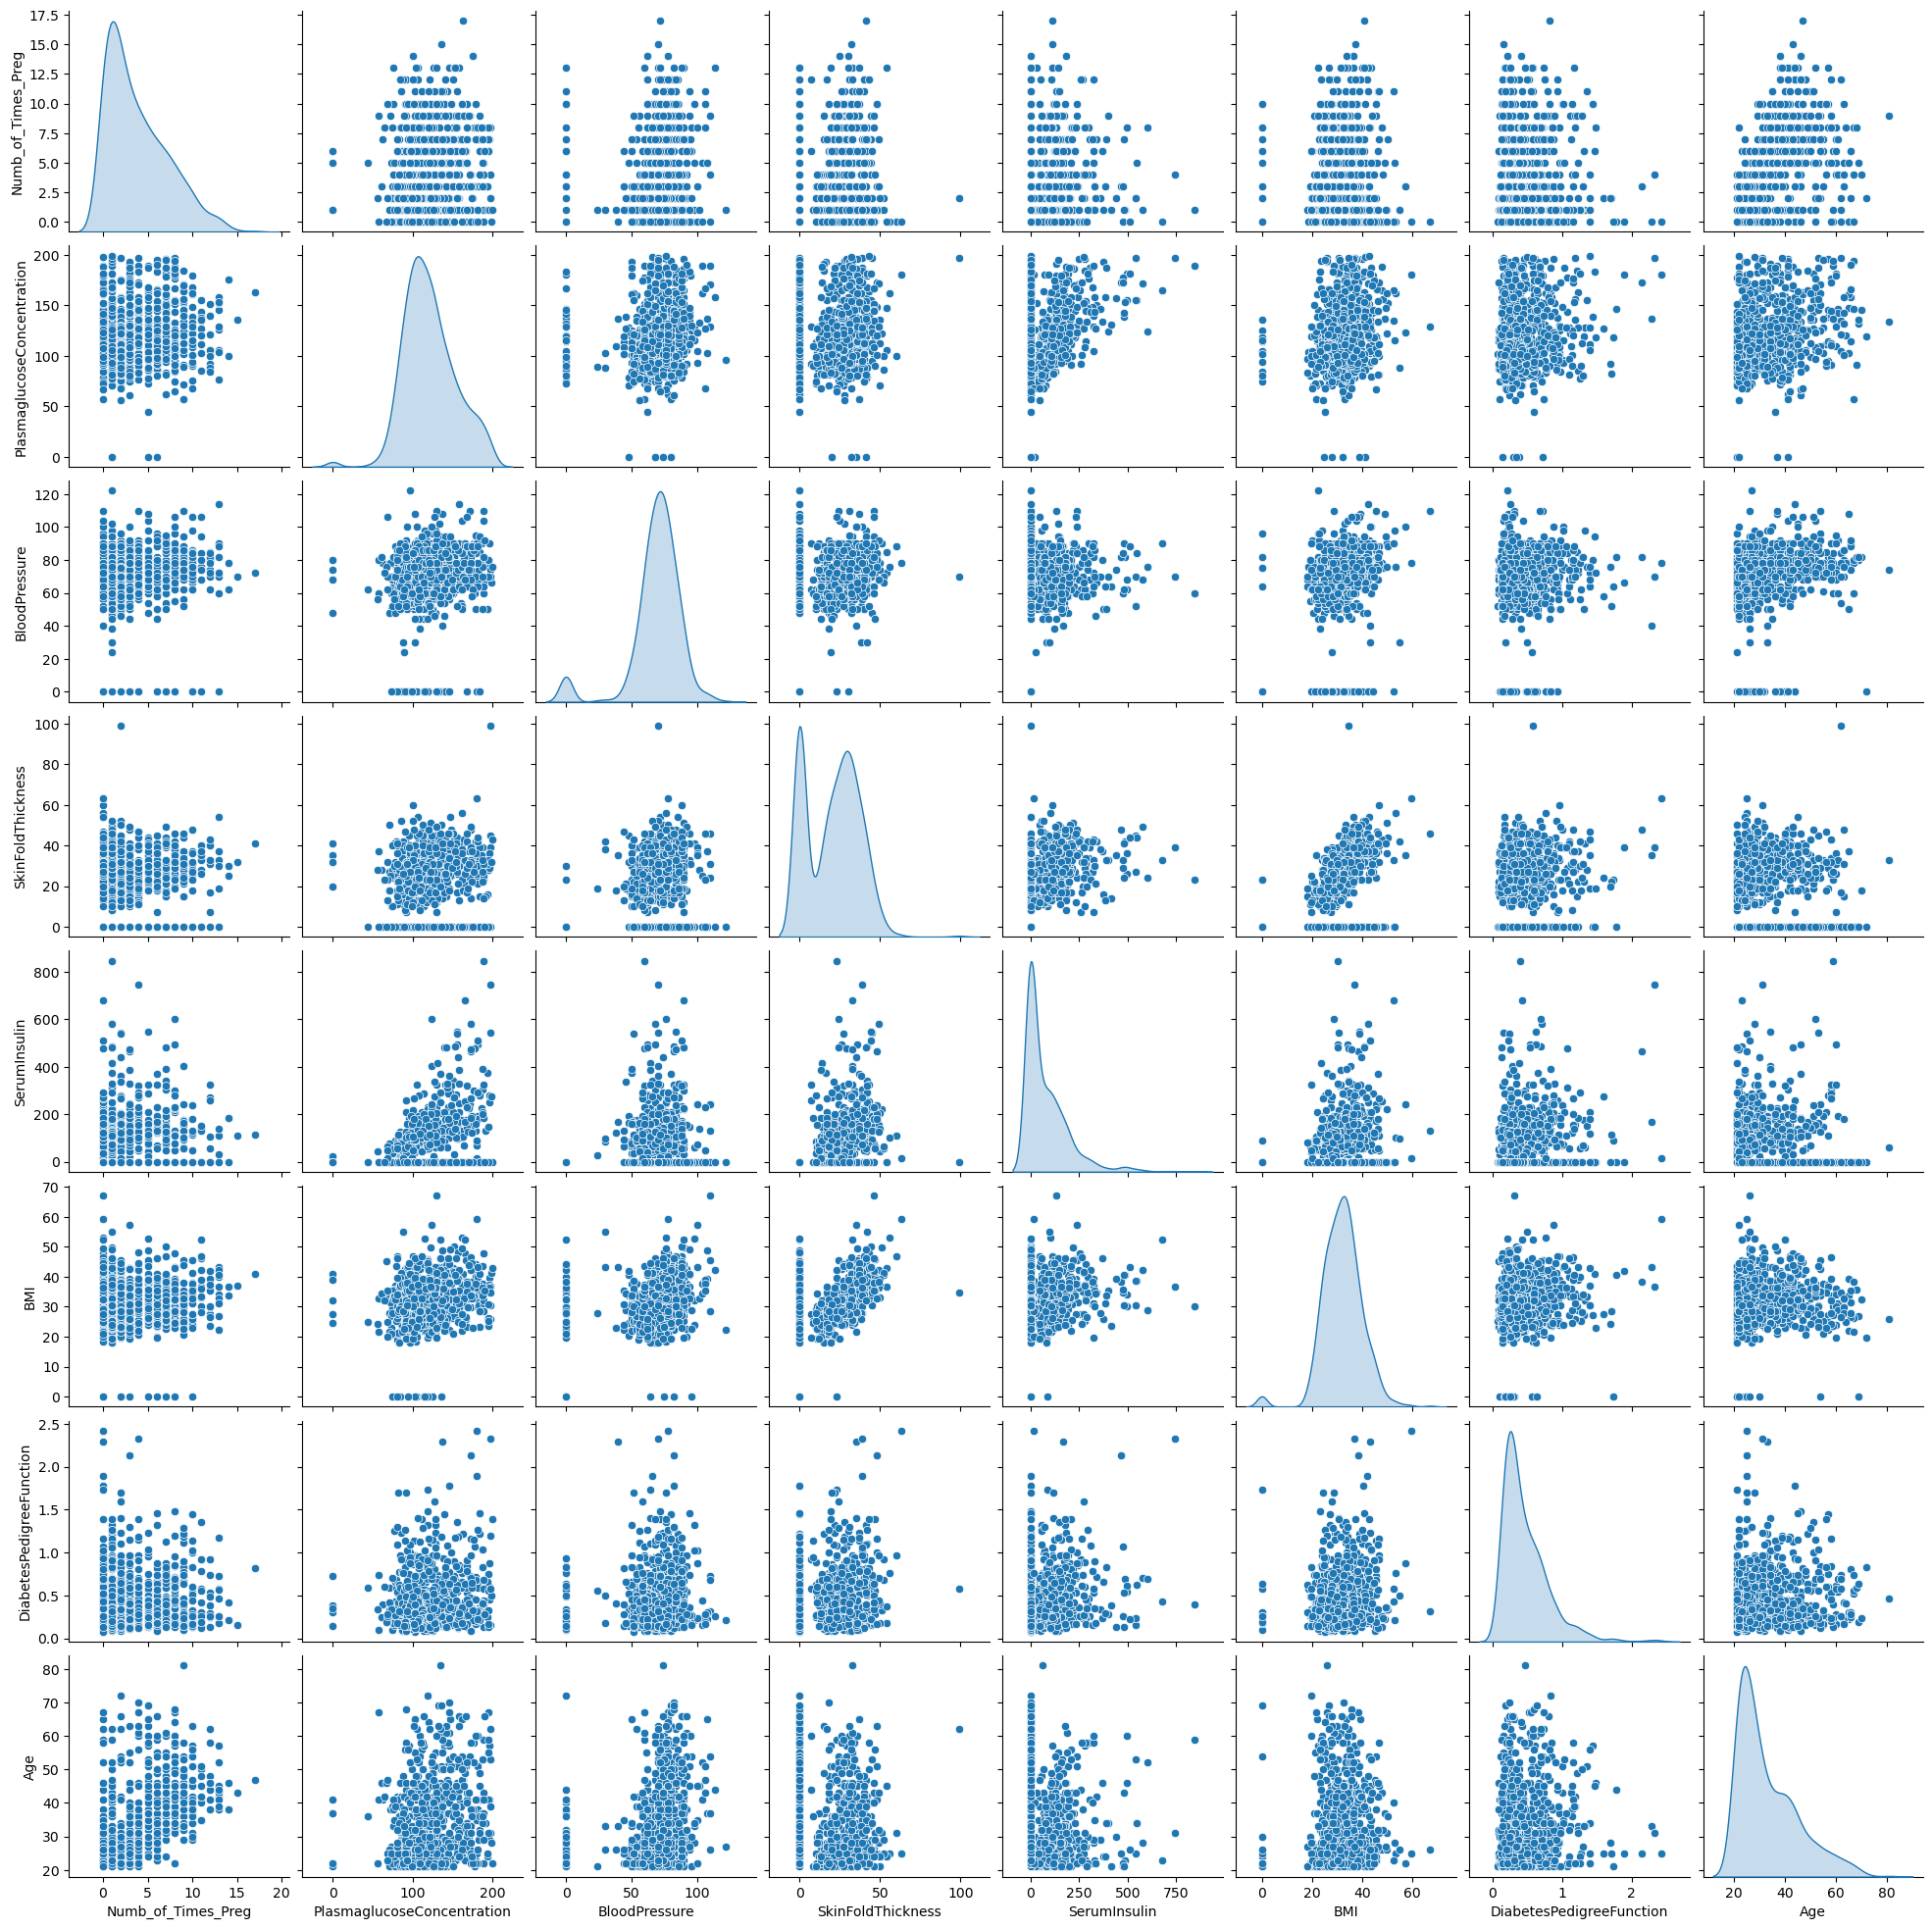

In [33]:
# pairplot to check for correlation
import seaborn as sns
sns.pairplot(data, diag_kind = "kde")


In [34]:
from sklearn.preprocessing import MinMaxScaler
X = data.values
Clus_dataSet = MinMaxScaler().fit_transform(X)
Clus_dataSet

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

In [35]:
Error =[]
for i in range(1, 10):
    kmeans = KMeans(init = "k-means++", n_clusters = i, n_init = 12)
    kmeans.fit(X)
    Error.append(kmeans.inertia_)

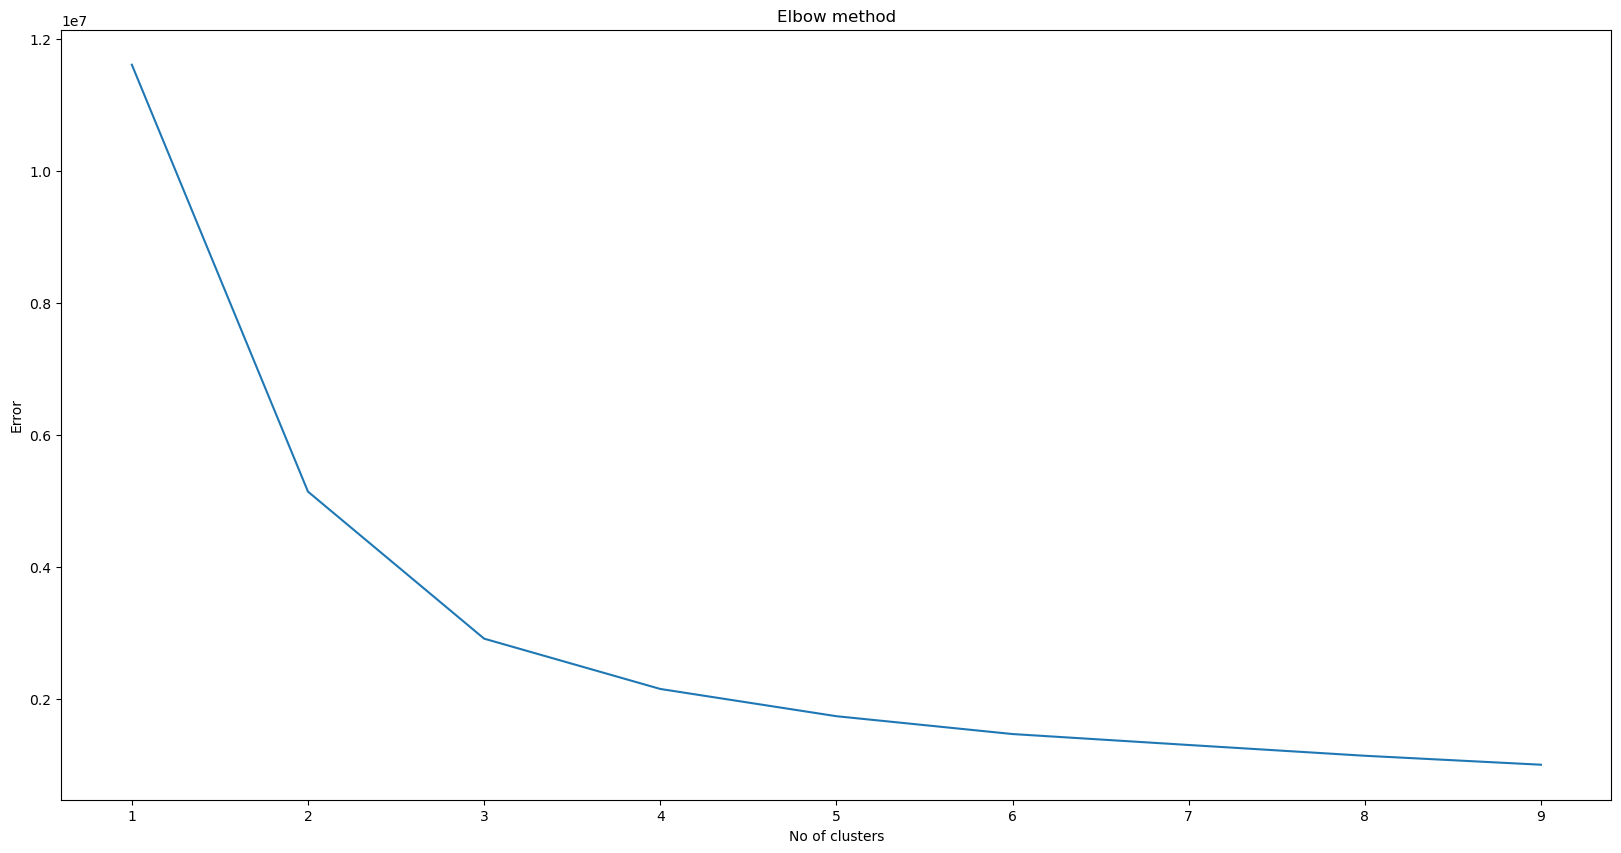

In [36]:
import matplotlib.pyplot as plt
plt.plot(range(1, 10), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [37]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[0 0 0 2 2 0 0 0 1 0 0 0 0 1 2 0 2 0 0 2 2 0 0 0 2 2 0 2 2 0 0 2 0 0 0 2 0
 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0 1 1 0 1 2 0 2 0 0 0 2 0 0 0 0 0 2 2 2 0 2
 0 0 0 0 0 0 0 0 0 0 0 2 0 0 2 0 0 2 0 0 0 2 0 0 0 2 0 0 0 0 0 2 0 2 0 0 2
 1 0 0 2 0 0 0 0 0 2 0 2 0 0 2 2 2 2 0 2 0 2 0 0 2 0 2 0 1 0 0 0 0 2 0 0 2
 0 0 2 0 2 1 0 0 2 2 0 2 0 2 2 0 0 2 0 0 0 0 0 2 0 0 0 2 0 2 0 0 0 2 0 0 0
 0 1 0 2 2 0 2 0 0 0 2 0 0 2 1 0 0 0 0 2 0 2 0 0 0 0 0 0 2 2 2 2 2 0 0 1 0
 0 2 0 0 0 0 1 0 0 1 0 0 0 0 2 0 0 0 0 0 0 2 2 0 0 1 1 0 0 0 0 0 2 0 0 0 1
 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 2 2 0 0 2 1 2 0 0 0 0 2 2 0 2
 1 2 2 0 0 2 0 0 0 2 2 2 2 2 0 2 2 0 0 2 0 0 2 0 2 0 0 0 0 2 2 0 2 0 0 0 0
 0 0 2 0 0 2 0 2 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 2 0 0 2 1 0 0 0 2 0 0 0 0 2
 1 2 0 2 2 1 0 0 0 0 0 0 2 0 2 0 0 0 2 0 2 0 1 0 0 2 2 0 0 0 0 0 2 0 0 2 0
 0 0 1 0 2 1 0 2 1 0 0 0 2 2 0 0 0 2 2 0 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0
 0 0 0 2 0 0 2 0 2 0 2 0 0 0 2 0 0 0 0 0 0 2 0 2 0 2 0 0 0 0 0 0 2 2 0 0 1
 0 0 2 0 2 1 2 0 0 0 0 0 

In [38]:
# assign the labels to the data
data["Clus_group"] = labels
data.head(5)

,Numb_of_Times_Preg,PlasmaglucoseConcentration,BloodPressure,SkinFoldThickness,SerumInsulin,BMI,DiabetesPedigreeFunction,Age,Clus_group
0,6,148,72,35,0,33.6,0.627,50,0
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,0
3,1,89,66,23,94,28.1,0.167,21,2
4,0,137,40,35,168,43.1,2.288,33,2


In [39]:
import plotly.express as px
fig = px.scatter(data, x="Age", y="Numb_of_Times_Preg", color="Clus_group",
                 size='Numb_of_Times_Preg', hover_data=['DiabetesPedigreeFunction'])
fig.show()

In [40]:
data.groupby('Clus_group').mean()

,Numb_of_Times_Preg,PlasmaglucoseConcentration,BloodPressure,SkinFoldThickness,SerumInsulin,BMI,DiabetesPedigreeFunction,Age
Clus_group,,,,,,,,
0,3.981818,114.008081,67.771717,14.997980,14.400000,30.805455,0.431931,33.759596
1,4.026316,158.447368,72.000000,32.263158,441.289474,35.107895,0.569211,34.763158
2,3.527660,129.327660,71.446809,30.306383,159.102128,33.989362,0.540277,31.902128


##  Hierarchical clustering

In [41]:
from sklearn.metrics.pairwise import euclidean_distances
import pylab
dist_matrix = euclidean_distances(Clus_dataSet,Clus_dataSet) 
print(dist_matrix)

[[0.         0.56380025 0.53665043 ... 0.45162548 0.50269284 0.62234648]
 [0.56380025 0.         0.7208524  ... 0.33774235 0.45222484 0.15595016]
 [0.53665043 0.7208524  0.         ... 0.4901339  0.58690672 0.72903545]
 ...
 [0.45162548 0.33774235 0.4901339  ... 0.         0.47201476 0.34337787]
 [0.50269284 0.45222484 0.58690672 ... 0.47201476 0.         0.5408326 ]
 [0.62234648 0.15595016 0.72903545 ... 0.34337787 0.5408326  0.        ]]


In [42]:
from scipy.cluster import hierarchy 
Z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'complete')

/var/folders/jw/pk9yd5v978d_6j_wky4ptw480000gn/T/ipykernel_69435/1713206993.py:2: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



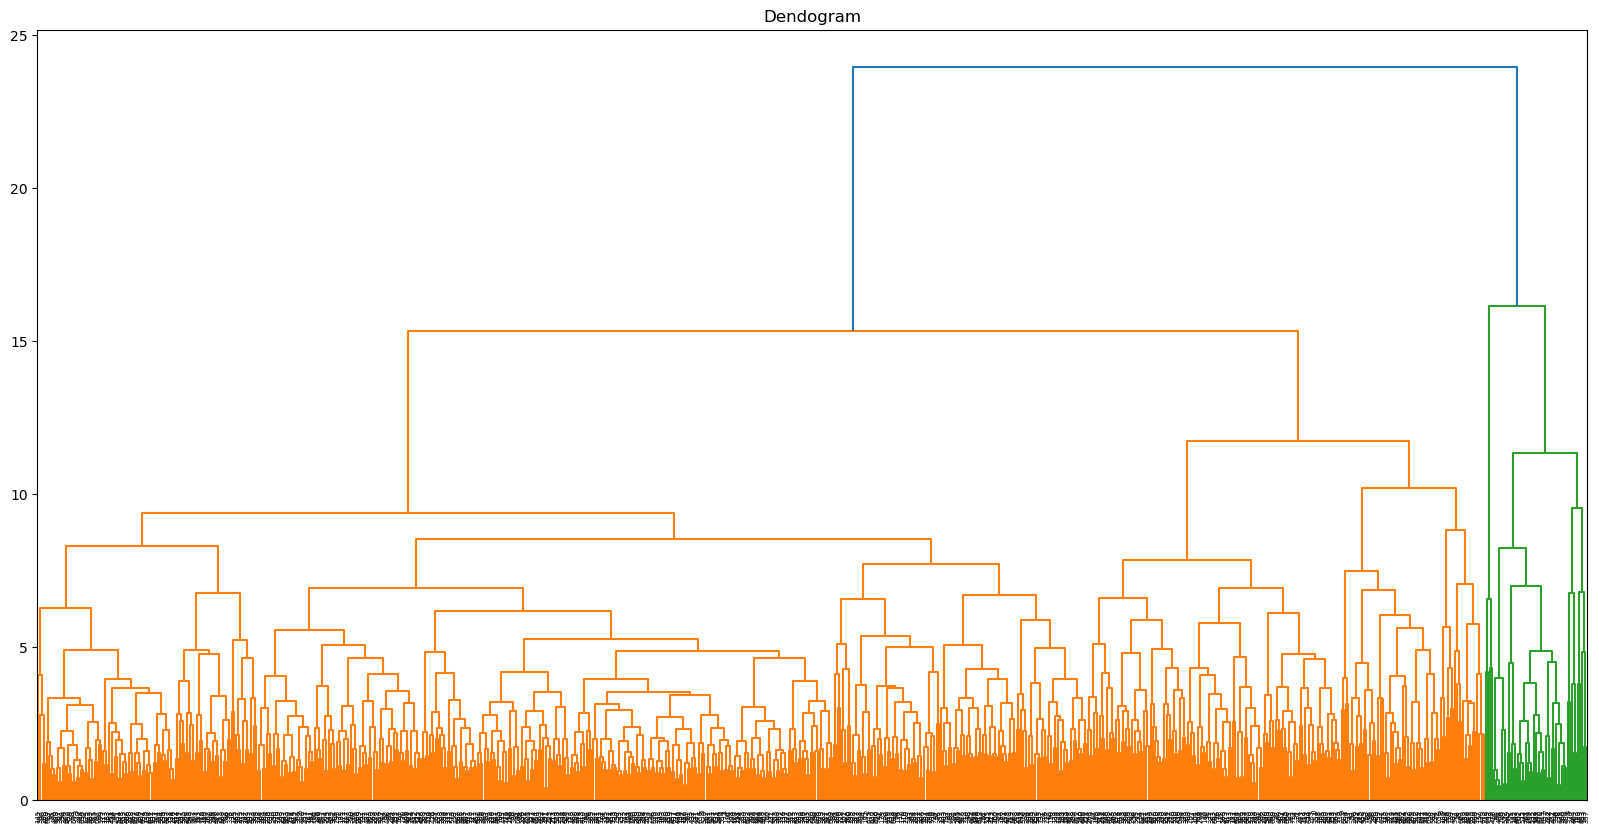

In [43]:
plt.rc("figure", figsize = (20,10))
dendro = hierarchy.dendrogram(Z_using_dist_matrix)
plt.title('Dendogram')
plt.show()